In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitter-tweets-sentiment-dataset/Tweets.csv


In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
df = pd.read_csv("/kaggle/input/twitter-tweets-sentiment-dataset/Tweets.csv")

In [5]:
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [7]:
df.isnull().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

<Axes: title={'center': 'Tweet Duygu Dağılımı'}, xlabel='sentiment'>

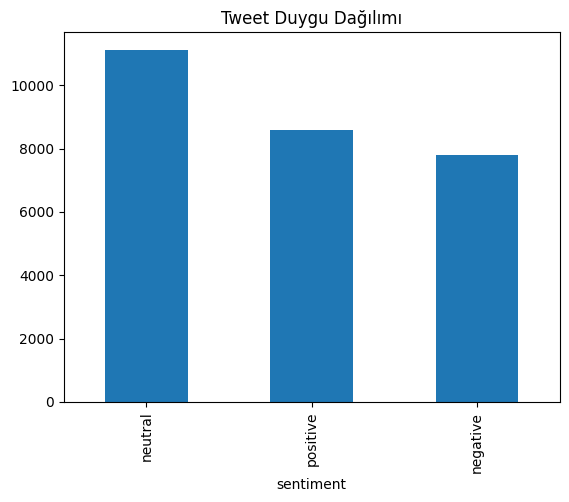

In [8]:
df['sentiment'].value_counts().plot(kind='bar', title='Tweet Duygu Dağılımı')

In [9]:
import re  # düzenli ifadeler için

def temizle(tweet):
    if isinstance(tweet, str):  # sadece string olanlara uygula
        tweet = tweet.lower()
        tweet = re.sub(r'http\S+', '', tweet)
        tweet = re.sub(r'@\w+', '', tweet)
        tweet = re.sub(r'#\w+', '', tweet)
        tweet = re.sub(r'\d+', '', tweet)
        tweet = re.sub(r'[^\w\s]', '', tweet)
        tweet = re.sub(r'\s+', ' ', tweet).strip()
        return tweet if tweet else None  # boşsa None döndür
    return None

In [10]:
df['clean_tweet'] = df['text'].apply(temizle)

In [11]:
df[['text', 'clean_tweet']].head()

,text,clean_tweet
0,"I`d have responded, if I were going",id have responded if i were going
1,Sooo SAD I will miss you here in San Diego!!!,sooo sad i will miss you here in san diego
2,my boss is bullying me...,my boss is bullying me
3,what interview! leave me alone,what interview leave me alone
4,"Sons of ****, why couldn`t they put them on t...",sons of why couldnt they put them on the relea...


In [12]:
import nltk
from nltk.corpus import stopwords

In [13]:
stop_words = {
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 
    "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 
    'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 
    'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 
    'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 
    'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 
    'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 
    'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 
    'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 
    'about', 'against', 'between', 'into', 'through', 'during', 'before', 
    'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 
    'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 
    'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 
    'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 
    'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 
    'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 
    'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', 
    "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 
    'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', 
    "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 
    'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', 
    "won't", 'wouldn', "wouldn't"
}

In [14]:
def stopword_sil(tweet):
    return " ".join([kelime for kelime in tweet.split() if kelime not in stop_words])

In [15]:
def stopword_sil(tweet):
    if isinstance(tweet, str):
        return " ".join([kelime for kelime in tweet.split() if kelime not in stop_words])
    else:
        return ""

In [16]:
df['clean_tweet'] = df['clean_tweet'].apply(stopword_sil)
df = df[df['clean_tweet'] != ""]

In [17]:
import matplotlib.pyplot as plt

In [18]:
df['tweet_length'] = df['clean_tweet'].apply(lambda x: len(str(x)))

In [19]:
print("Ortalama Tweet Uzunluğu:", df['tweet_length'].mean())

Ortalama Tweet Uzunluğu: 42.95378442458508


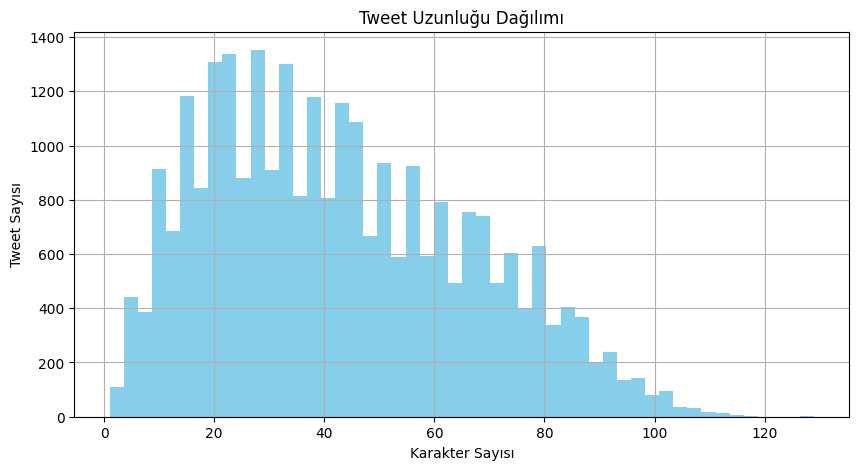

In [20]:
df['tweet_length'].hist(bins=50, figsize=(10,5), color='skyblue')
plt.title("Tweet Uzunluğu Dağılımı")
plt.xlabel("Karakter Sayısı")
plt.ylabel("Tweet Sayısı")
plt.show()

In [21]:
from collections import Counter

In [22]:
all_words = ' '.join(df['clean_tweet']).split()

In [23]:
word_freq = Counter(all_words).most_common(20)

In [24]:
print("En Sık Geçen 20 Kelime:")
for kelime, frekans in word_freq:
    print(f"{kelime}: {frekans}")

En Sık Geçen 20 Kelime:
im: 3025
day: 2085
good: 1549
get: 1427
like: 1346
go: 1266
dont: 1200
love: 1122
work: 1112
today: 1097
going: 1096
got: 1074
cant: 1023
happy: 974
one: 970
lol: 952
time: 943
u: 931
know: 931
really: 908


In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [26]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['clean_tweet']))

In [27]:
!pip install wordcloud


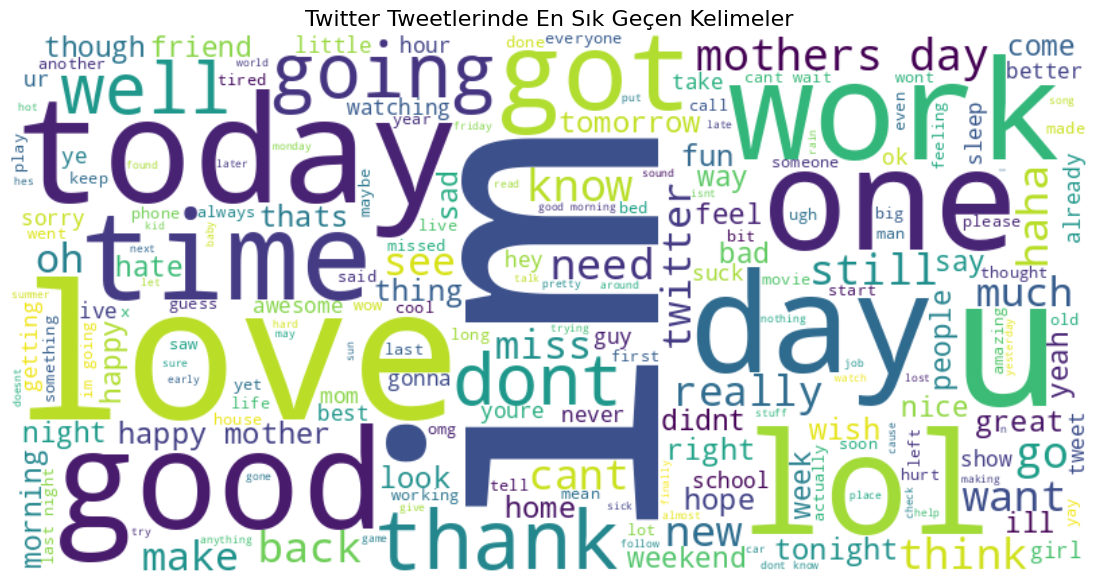

In [28]:
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Twitter Tweetlerinde En Sık Geçen Kelimeler", fontsize=16)
plt.show()

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
vectorizer = TfidfVectorizer(max_features=1000)

In [31]:
X = vectorizer.fit_transform(df['clean_tweet'])

In [32]:
print("TF-IDF Özellik Matrisi Boyutu:", X.shape)


TF-IDF Özellik Matrisi Boyutu: (27415, 1000)


In [33]:
tfidf_words = vectorizer.get_feature_names_out()
idf_values = vectorizer.idf_

In [34]:
for word, idf in zip(tfidf_words[:10], idf_values[:10]):
    print(f"{word}: IDF={idf:.2f}")

able: IDF=6.70
absolutely: IDF=7.39
account: IDF=7.09
actually: IDF=6.03
add: IDF=7.33
afternoon: IDF=7.19
ages: IDF=7.85
ago: IDF=6.59
agree: IDF=7.35
ah: IDF=6.82


In [35]:
idf_df = pd.DataFrame({'word': tfidf_words, 'idf': idf_values})

In [36]:
top_idf_words = idf_df.sort_values(by='idf', ascending=False).head(10)

In [37]:
print("\n🔍 En Değerli (Yüksek IDF) 10 Kelime:")
print(top_idf_words)


🔍 En Değerli (Yüksek IDF) 10 Kelime:
         word       idf
96      brain  8.000006
305      foot  7.960786
784     stand  7.960786
395      hold  7.960786
540      milk  7.960786
507       low  7.923045
293      five  7.923045
640  planning  7.923045
92        box  7.923045
439      iï½m  7.923045


In [38]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [39]:
bow_vectorizer = CountVectorizer(max_features=1000)
X_bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [40]:
print("BoW matris boyutu:", X_bow.shape)

BoW matris boyutu: (27415, 1000)


In [41]:
sample_texts = df['clean_tweet'].dropna().sample(3, random_state=42).tolist()

In [42]:
bow_vectorizer = CountVectorizer()

In [43]:
X_bow_sample = bow_vectorizer.fit_transform(sample_texts)

In [44]:
words = bow_vectorizer.get_feature_names_out()

In [45]:
sample_bow_df = pd.DataFrame(X_bow_sample.toarray(), columns=words)

In [46]:
print("📝 Örnek Tweet:\n", sample_texts[0])
print("\n📊 BoW Vektörü:")
print(sample_bow_df.iloc[0])

📝 Örnek Tweet:
 evr brngs starbux corieography

📊 BoW Vektörü:
alone                0
brngs                1
corieography         1
evr                  1
fraser               0
get                  0
impression           0
leave                0
little               0
starbux              1
twittercopytopify    0
Name: 0, dtype: int64


In [47]:
etiket_map = {'negative': 0, 'neutral': 1, 'positive': 2}
df['label'] = df['sentiment'].map(etiket_map)

In [48]:
X = vectorizer.transform(df['clean_tweet'])
y = df['label']

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [51]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.56      0.63      1584
           1       0.61      0.74      0.67      2185
           2       0.77      0.70      0.73      1714

    accuracy                           0.68      5483
   macro avg       0.69      0.67      0.68      5483
weighted avg       0.69      0.68      0.68      5483



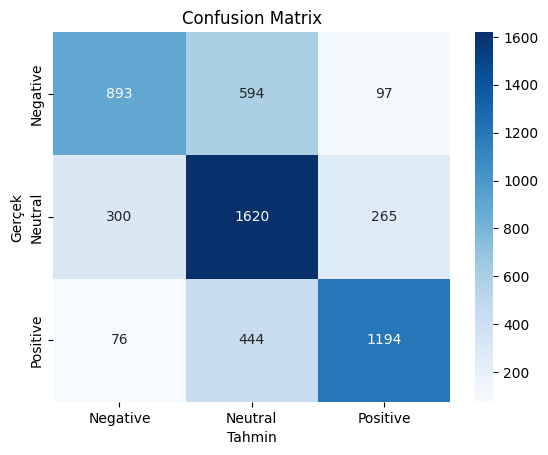

In [53]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Tahmin')
plt.ylabel('Gerçek')
plt.title('Confusion Matrix')
plt.show()


In [54]:
def predict_sentiment(text):
    vector = vectorizer.transform([text])
    pred = model.predict(vector)[0]
    labels = {0: 'Negatif ', 1: 'Nötr ', 2: 'Pozitif '}
    return labels[pred]

In [55]:
print(predict_sentiment(df['clean_tweet'].iloc[0]))
print(predict_sentiment(df['clean_tweet'].iloc[10]))

Nötr 
Pozitif 


In [56]:
df_lda = df[['clean_tweet']].dropna().copy()
df_lda['tokens'] = df_lda['clean_tweet'].apply(nltk.word_tokenize)

In [57]:
documents = df_lda['tokens'].sample(5000, random_state=42).tolist()

In [58]:
import nltk

In [59]:
df_lda = df[['clean_tweet']].dropna().copy()


In [60]:
df_lda['tokens'] = df_lda['clean_tweet'].apply(nltk.word_tokenize)

In [61]:
documents = df_lda['tokens'].sample(5000, random_state=42).tolist()

In [62]:
from gensim import corpora
dictionary = corpora.Dictionary(documents)

In [63]:
corpus = [dictionary.doc2bow(doc) for doc in documents]

In [64]:
from gensim.models.ldamodel import LdaModel

In [65]:
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, random_state=42, passes=10)

In [66]:
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}\n")

Topic: 0 
Words: 0.022*"dont" + 0.015*"im" + 0.013*"ill" + 0.012*"see" + 0.011*"wish" + 0.010*"like" + 0.010*"get" + 0.010*"work" + 0.009*"could" + 0.008*"please"

Topic: 1 
Words: 0.029*"na" + 0.018*"gon" + 0.016*"home" + 0.015*"back" + 0.013*"go" + 0.013*"sleep" + 0.013*"im" + 0.012*"going" + 0.011*"wan" + 0.009*"soon"

Topic: 2 
Words: 0.033*"cant" + 0.018*"bad" + 0.014*"im" + 0.011*"wait" + 0.010*"day" + 0.010*"go" + 0.008*"make" + 0.008*"sorry" + 0.007*"still" + 0.007*"party"

Topic: 3 
Words: 0.019*"im" + 0.012*"get" + 0.011*"night" + 0.009*"feel" + 0.009*"good" + 0.008*"tomorrow" + 0.007*"guys" + 0.006*"phone" + 0.006*"hate" + 0.006*"time"

Topic: 4 
Words: 0.017*"want" + 0.010*"miss" + 0.009*"way" + 0.008*"got" + 0.007*"thank" + 0.007*"hes" + 0.007*"awesome" + 0.007*"free" + 0.007*"work" + 0.006*"doesnt"

Topic: 5 
Words: 0.016*"time" + 0.013*"twitter" + 0.011*"well" + 0.010*"friday" + 0.010*"love" + 0.008*"old" + 0.008*"haha" + 0.008*"good" + 0.007*"wont" + 0.007*"get"

Topic:

In [67]:
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.104814  0.037188       1        1  12.886504
0      0.064894 -0.042506       2        1  12.529818
6      0.042634  0.057316       3        1  11.603158
1      0.035080 -0.185243       4        1  10.918084
7     -0.012903 -0.066216       5        1  10.735328
5      0.024146 -0.010428       6        1   9.269292
2      0.051169  0.098994       7        1   8.669693
8      0.044443  0.091277       8        1   8.457956
4     -0.158864 -0.081410       9        1   8.301009
9     -0.195415  0.101028      10        1   6.629158, topic_info=        Term        Freq       Total Category  logprob  loglift
45     happy  154.000000  154.000000  Default  30.0000  30.0000
43       day  301.000000  301.000000  Default  29.0000  29.0000
819       na  115.000000  115.000000  Default  28.0000  28.0000
216     cant  163.000000  163.000000  Default  27.0000  27.0000
46   mothers   99.000000   99.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
153      got   11.806033  184.812936  Topic10  -5.3103  -0.0370
18     thats    9.790952   87.023919  Topic10  -5.4975   0.5290
48      dont   10.240931  189.044701  Topic10  -5.4525  -0.2019
409     take    9.080199   39.500727  Topic10  -5.5728   1.2435
259     like    9.714755  219.121137  Topic10  -5.5053  -0.4023

[686 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
401       4  0.907443  absolutely
5802      6  0.859764         abt
844       2  0.951027     account
6759      5  0.848014        adam
1347      3  0.928216        ages
...     ...       ...         ...
227       5  0.060836       youre
227       6  0.283900       youre
227       8  0.060836       youre
1994      3  0.858113          yr
1934      9  0.868773         yum

[1310 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 7, 2, 8, 6, 3, 9, 5, 10])